In [1]:
import datetime
import os
from mdagent import MDAgent
import matplotlib.pyplot as plt

In [2]:
prompt16 = "Simulate Trypsin (1TRN) for 1ns at 300K and compute SASA."
llm_var = "gpt-4o-2024-05-13"
tools = "all"
agent = MDAgent(agent_type="Structured", model=llm_var, top_k_tools=tools)
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
print("LLM: ",agent.llm.model_name,"\nTemperature: ",agent.llm.temperature)

date and time: 2024-07-21
time: 16:50:51
LLM:  gpt-4o-2024-05-13 
Temperature:  0.1


In [3]:
agent.run(prompt16)

Thought: To simulate Trypsin (PDB ID: 1TRN) for 1 nanosecond (ns) at 300 Kelvin (K) and compute the Solvent Accessible Surface Area (SASA), I will first need to download the PDB file for Trypsin. Then, I will set up and run the molecular dynamics simulation. Finally, I will compute the SASA for the resulting trajectory.

Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": "1TRN"
}
```PDB file found with this ID: 1TRN


2024-07-21 16:50:54.587 
  command:

    streamlit run /Users/jorgemedina/miniforge3/envs/mdagent2/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]


To proceed with the simulation of Trypsin (1TRN) for 1 nanosecond (ns) at 300 Kelvin (K), I will set up and run the molecular dynamics simulation using the downloaded PDB file. After the simulation, I will compute the Solvent Accessible Surface Area (SASA) for the resulting trajectory.

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1TRN_165054",
    "forcefield_files": [],
    "save": true,
    "system_params": {
      "nonbondedMethod": "PME",
      "nonbondedCutoff": "1 * nanometers",
      "ewaldErrorTolerance": 0.0001,
      "constraints": "HBonds",
      "rigidWater": true,
      "constraintTolerance": 0.00001,
      "solvate": true
    },
    "integrator_params": {
      "integrator_type": "LangevinMiddle",
      "Temperature": "300 * kelvin",
      "Friction": "1.0 / picoseconds",
      "Timestep": "0.002 * picoseconds",
      "Pressure": "1.0 * bar"
    },
    "simulation_params": {
      "Ensemble": "NPT",
      "Number of Steps": 500000,


('Final Answer: The molecular dynamics simulation of Trypsin (PDB ID: 1TRN) for 1 nanosecond at 300K has been successfully completed. The Solvent Accessible Surface Area (SASA) for the resulting trajectory has been computed and saved. The SASA values are stored with File ID sasa_sim0_165108, and the corresponding plot is saved with plot ID fig0_233807.',
 'XL2OSBO2')

In [4]:
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
registry = agent.path_registry
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

date and time: 2024-07-21
time: 23:38:14
Files found in registry: 1TRN_165054: PDB file downloaded from RSCB
 PDBFile ID: 1TRN_165054
 1TRN_165105: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_165108: Initial positions for simulation sim0_165108
 sim0_165108: Basic Simulation of Protein 1TRN_165105
 rec0_165119: Simulation trajectory for protein 1TRN_165105 and simulation sim0_165108
 rec1_165119: Simulation state log for protein 1TRN_165105 and simulation sim0_165108
 rec2_165119: Simulation pdb frames for protein 1TRN_165105 and simulation sim0_165108
 sasa_sim0_165108: Total SASA values for sim0_165108
 fig0_233807: Plot of SASA over time for sim0_165108


In [6]:
traj_path_1 = registry.get_mapped_path("rec0_165119") 
top_path_1 = registry.get_mapped_path("top_sim0_165108")

fig_path = registry.get_mapped_path("fig0_233807")

assert os.path.exists(traj_path_1)
assert os.path.exists(top_path_1)
assert os.path.exists(fig_path)



Number of frames:  100


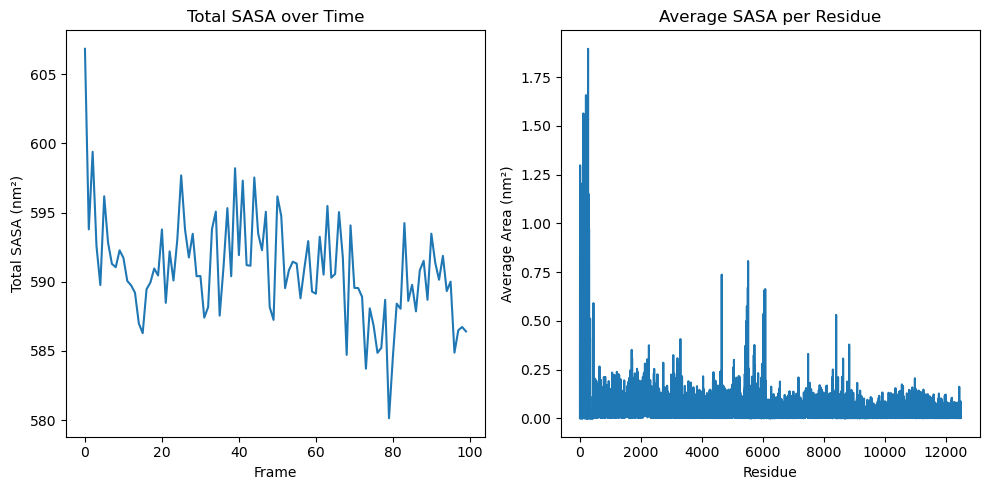

In [7]:
import mdtraj as md
import numpy as np
from IPython.display import display, Image
#print number of frames adn residues:
traj = md.load(traj_path_1, top=top_path_1)

print("Number of frames: ", traj.n_frames)
Image(filename=fig_path)


# Experiment Result:
### Completed without Exception or TimeOut Errors ✅
### Attempted all necessary steps ✅
### Logic make sense ✅
### Correct Answer  ✅